<!--- SPDX-License-Identifier: Apache-2.0 -->

<p align="center"><img width="40%" src="https://github.com/onnx/onnx/raw/master/docs/ONNX_logo_main.png" /></p>


[Open Neural Network Exchange (ONNX)](https://onnx.ai) is an open ecosystem that empowers AI developers
to choose the right tools as their project evolves. ONNX provides an open source format for AI models, both deep learning and traditional ML. It defines an extensible computation graph model, as well as definitions of built-in operators and standard
data types. Currently we focus on the capabilities needed for inferencing (scoring).

ONNX is [widely supported](http://onnx.ai/supported-tools) and can be found in many frameworks, tools, and hardware. Enabling interoperability between different frameworks and streamlining the path from research to production helps increase the speed of innovation in the AI community. We invite the community to join us and further evolve ONNX.

# Use ONNX
* [Tutorials for creating ONNX models](https://github.com/onnx/tutorials).
* [Pre-trained ONNX models](https://github.com/onnx/models)

# Learn about the ONNX spec
* [Overview][overview]
* [ONNX intermediate representation spec][ir]
* [Versioning principles of the spec][versioning]
* [Operators documentation][operators]
* [Python API Overview][python_api]

# Programming utilities for working with ONNX Graphs
* [Shape and Type Inference][shape_inference]
* [Graph Optimization](https://github.com/onnx/optimizer)
* [Opset Version Conversion][version_converter]



In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import keras2onnx
import onnxruntime
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load a normal pre-trained imagenet model

In [5]:
# from tensorflow.keras.applications.resnet50 import ResNet50
# model = ResNet50(include_top=True, weights='imagenet')
from tensorflow import keras
model = keras.models.load_model('my_model.h5')


# Converting to ONNX format

In [6]:
onnx_model = keras2onnx.convert_keras(model, model.name)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 31 -> 17


# Create a data feed 

In [40]:
# img_path = 'street.jpg'   # make sure the image is in img_path
# img_size = 224
# img = image.load_img(img_path, target_size=(img_size, img_size))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
# x.shape

(1, 224, 224, 3)

In [7]:
import pandas as pd
df = pd.read_csv('./challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv')
df.head()
s = df.loc[0,'pixels']
x = s.split()
x = np.array(x, dtype=np.float32)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = x.reshape(1,48,48,1)

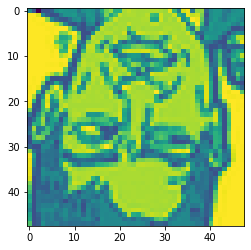

In [8]:
plt.imshow(x[0,:,:,0])

In [9]:
content = onnx_model.SerializeToString()
sess = onnxruntime.InferenceSession(content)
x = x if isinstance(x, list) else [x]
feed = dict([(input.name, x[n]) for n, input in enumerate(sess.get_inputs())])

In [11]:
pred_onnx = sess.run(None, feed)
pred_onnx

[array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)]

In [12]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [16]:
print(f'prediction is \'{emotions[np.argmax(pred_onnx)]}\'')

prediction is 'Happy'


# Saving the model using keras2onnx

In [17]:
temp_model_file = 'model.onnx'
keras2onnx.save_model(onnx_model, temp_model_file)
sess = onnxruntime.InferenceSession(temp_model_file)

In [18]:
x = x if isinstance(x, list) else [x]
feed = dict([(input.name, x[n]) for n, input in enumerate(sess.get_inputs())])
pred_onnx = sess.run(None, feed)

# Saving and loading a model using ONNXmltTools

In [20]:
! pip install onnxmltools

     |████████████████████████████████| 252 kB 442 kB/s eta 0:00:01
     |████████████████████████████████| 230 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.3 MB/s eta 0:00:01
  Attempting uninstall: onnxconverter-common
    Found existing installation: onnxconverter-common 1.8.1
    Uninstalling onnxconverter-common-1.8.1:
      Successfully uninstalled onnxconverter-common-1.8.1


In [21]:
import onnxmltools

In [22]:
# output_onnx_model = 'model.onnx'
# model = ResNet50(include_top=True, weights='imagenet')

from tensorflow import keras
model = keras.models.load_model('my_model.h5')
onnx_model = onnxmltools.convert_keras(model)

# Save as protobuf
temp_model_file = 'model.onnx'
onnxmltools.utils.save_model(onnx_model, temp_model_file)

tf executing eager_mode: True
tf.keras model eager_mode: False


TypeError: must be str, not NoneType

In [20]:
onnxmltools.utils.load_model(output_onnx_model)